In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
sc.settings.verbosity = 0
#from anndata import AnnData
import scipy
#from numpy.linalg import svd


import warnings
warnings.filterwarnings("ignore")


In [2]:
try:
    from sys import path as syspath
    from os import path as ospath
    syspath.append(ospath.join(ospath.expanduser("~"), 'Documents/git/Xct'))

    from scTenifoldXct.main import *
    import scTenifoldXct.dNN as dNN    
    import scTenifoldXct.visualization as vis
    
except ImportError:
    print('Module not found')

In [3]:
# ada = sc.read_h5ad("data/uterus_processed.h5ad")
# ada

In [4]:
ada_WT = sc.read_h5ad("../data/uterus_processed_WT.h5ad")

ada_WT.shape

(2177, 3000)

In [5]:
ada_WT.obs['ident'].value_counts()

stromal cells        737
myocytes             631
epithelial cells     508
endothelial cells    133
pericytes             85
lymphocytes           46
mesothelial cells     22
myeloid cells         15
Name: ident, dtype: int64

## WT vs KO:

In [6]:
# obj1 = Xct(ada_WT, 'stromal cells', 'epithelial cells', specis='Mouse', build_GRN = True, save_GRN = True, 
#           pcNet_name = 'Net_Stro2Epi_WT_new', mode = 'full', verbose=True)

obj1 = Xct(ada_WT, 'stromal cells', 'epithelial cells', specis='Mouse', build_GRN = False,
           pcNet_name = 'Net_Stro2Epi_WT', mode = 'full', verbose=True)

print(obj1)

init an Xct object for interactions from stromal cells (737) to epithelial cells (508)...
loading GRNs...
building correspondence...
init completed.

Xct object for interactions from stromal cells (737) to epithelial cells (508)
# of genes = 3000 X 3000 
Correspondence = 6000 X 6000


In [7]:
obj1._w.shape

(6000, 6000)

In [8]:
hox = ada_WT.var_names[ada_WT.var_names.str.startswith('Hox', na=False)]
hox

Index(['Hoxa7', 'Hoxa3', 'Hoxa11os', 'Hoxa2', 'Hoxc9', 'Hoxb8', 'Hoxb6',
       'Hoxb7'],
      dtype='object')

In [9]:
obj2 = KnK(obj1, hox, copy=True)

In [10]:
obj1._w[206]

array([0.99995228, 1.00029437, 1.00015326, ..., 0.11063846, 0.15303877,
       0.00222913])

In [11]:
obj2._w[206] #check

array([0., 0., 0., ..., 0., 0., 0.])

In [12]:
df1 = obj1.fill_metric()
df1

,ligand,receptor,mean_L,mean_R,var_L,var_R,disp_L,disp_R,cv_L,cv_R,cv_res_L,cv_res_R
18,Igf1,Ntrk2,1.081439,0.020576,1.495801,0.031285,1.383158,1.520463,1.130928,8.596192,0.118320,-0.050668
19,Igf2,Ntrk2,0.760958,0.020576,1.124664,0.031285,1.477958,1.520463,1.393640,8.596192,0.058786,-0.050668
30,Pdgfa,Ntrk2,0.048685,0.020576,0.087633,0.031285,1.799980,1.520463,6.080437,8.596192,-0.046643,-0.050668
32,Fgf1,Ntrk2,0.002687,0.020576,0.005315,0.031285,1.977776,1.520463,27.129320,8.596192,-0.039716,-0.050668
35,Fgf7,Ntrk2,0.037522,0.020576,0.067222,0.031285,1.791539,1.520463,6.909876,8.596192,-0.001346,-0.050668
...,...,...,...,...,...,...,...,...,...,...,...,...
7907,Lama4,Prnp,0.286792,0.545182,0.489649,0.703650,1.707328,1.290671,2.439915,1.538640,0.032563,0.030632
7911,Lama3,Prnp,0.002147,0.545182,0.003392,0.703650,1.580019,1.290671,27.129320,1.538640,-0.039716,0.030632
7914,Lamb3,Prnp,0.017418,0.545182,0.032935,0.703650,1.890810,1.290671,10.418896,1.538640,0.006679,0.030632
7915,Lama2,Prnp,0.354710,0.545182,0.554975,0.703650,1.564588,1.290671,2.100213,1.538640,0.013862,0.030632


In [13]:
#selected LR pairs
candidates = get_candidates(df1)
print(len(candidates))

385


#### single object:

1:

In [14]:
counts_np1 = get_counts_np(obj1)
len(counts_np1), counts_np1[0].shape, counts_np1[1].shape

(2, (3000, 737), (3000, 508))

In [15]:
projections1, losses1 = dNN.train_and_project(counts_np1, obj1._w, dim = 2, steps = 1000, lr = 0.01)

Net(
  (linear1): Linear(in_features=737, out_features=152, bias=True)
  (linear2): Linear(in_features=152, out_features=38, bias=True)
  (linear3): Linear(in_features=38, out_features=2, bias=True)
)
Net(
  (linear1): Linear(in_features=508, out_features=124, bias=True)
  (linear2): Linear(in_features=124, out_features=31, bias=True)
  (linear3): Linear(in_features=31, out_features=2, bias=True)
)
1 5020.5107421875
100 884.8057250976562
200 849.9647827148438
300 850.8693237304688
400 848.3668823242188
500 848.3430786132812
600 848.017333984375
700 848.0882568359375
800 848.143310546875
900 848.0172119140625
1000 847.9152221679688


In [16]:
df_nn1 = nn_aligned_dist(obj1, projections1)
df_nn1

computing pair-wise distances...
manifold aligned # of pairs: 9000000
adding column 'rank'...
adding column 'correspondence_score'...


,idx,dist,rank,correspondence_score
mt-Rnr1_Ptn,"(2921, 2048)",0.000002,1,4.454391e+01
Gm7729_Ybx1,"(1303, 1930)",0.000002,2,6.095829e+01
Cygb_Shfm1,"(2056, 2558)",0.000002,3,5.915681e+01
Id3_Tmsb4x,"(2397, 2444)",0.000003,4,8.014101e+01
Hmgn2_1810037I17Rik,"(405, 643)",0.000003,5,5.985119e+01
...,...,...,...,...
Cmah_St6gal2,"(1407, 21)",0.032659,8999996,9.409825e-48
Cmah_Serpina3g,"(1407, 36)",0.032659,8999997,9.409825e-48
Cmah_Srrm4,"(1407, 37)",0.032659,8999998,9.409825e-48
Cmah_Fam78a,"(1407, 153)",0.032659,8999999,9.409825e-48


In [17]:
df_enriched1 = chi2_test(df_nn1, df = 3, pval = 0.05, FDR = True, candidates = candidates)

df_enriched1


Total enriched: 9 / 9000000


,idx,dist,rank,correspondence_score,q_val,enriched_rank
Anxa2_Plat,"(1423, 2711)",0.000665,21808,73.679848,0.002158,1
Lama2_Rpsa,"(703, 1003)",0.000973,32136,48.027979,0.004594,2
Igf1_Fgfr2,"(2411, 969)",0.001456,48866,26.961390,0.010101,3
Ptn_Ncl,"(2048, 1756)",0.001866,63186,295.721522,0.016442,4
Igf2_Fgfr2,"(2080, 969)",0.002003,67989,17.571088,0.018901,5
Tgfb2_Plat,"(1408, 2711)",0.002012,68320,21.406035,0.019077,6
Wnt16_Fzd10,"(2442, 2271)",0.003001,106040,16.103748,0.040653,7
Ybx1_Notch1,"(1930, 308)",0.003245,116418,15.224370,0.046803,8
Igf1_Epha4,"(2411, 1728)",0.003339,120425,15.788986,0.049269,9


2:

In [18]:
counts_np2 = get_counts_np(obj2)
len(counts_np2), counts_np2[0].shape, counts_np2[1].shape

(2, (3000, 737), (3000, 508))

In [19]:
projections2, losses2 = dNN.train_and_project(counts_np2, obj2._w, dim = 2, steps = 1000, lr = 0.01)

Net(
  (linear1): Linear(in_features=737, out_features=152, bias=True)
  (linear2): Linear(in_features=152, out_features=38, bias=True)
  (linear3): Linear(in_features=38, out_features=2, bias=True)
)
Net(
  (linear1): Linear(in_features=508, out_features=124, bias=True)
  (linear2): Linear(in_features=124, out_features=31, bias=True)
  (linear3): Linear(in_features=31, out_features=2, bias=True)
)
1 5003.4599609375
100 881.0554809570312
200 845.9406127929688
300 845.1068725585938
400 844.2485961914062
500 844.2207641601562
600 844.1370239257812
700 843.6408081054688
800 843.6788330078125
900 843.4201049804688
1000 843.5198974609375


In [20]:
df_nn2 = nn_aligned_dist(obj2, projections2)
df_nn2

computing pair-wise distances...
manifold aligned # of pairs: 9000000
adding column 'rank'...
adding column 'correspondence_score'...


,idx,dist,rank,correspondence_score
Robo2_Rpl22,"(1329, 1662)",0.000001,1,100.706244
Srgn_Dbi,"(2406, 2108)",0.000001,2,55.798672
Gm5641_Hes1,"(2028, 2559)",0.000002,3,54.991492
Fkbp3_Ddx6,"(610, 163)",0.000002,4,55.676015
Cdh11_Gm6793,"(2245, 1540)",0.000002,5,73.686708
...,...,...,...,...
Hoxa7_Sept4,"(206, 2330)",0.032816,8999996,0.000000
Hoxa7_Atf3,"(206, 2326)",0.032816,8999997,0.000000
Hoxa7_Hck,"(206, 2318)",0.032816,8999998,0.000000
Hoxa7_Cyct,"(206, 696)",0.032816,8999999,0.000000


In [21]:
df_enriched2 = chi2_test(df_nn2, df = 3, pval = 0.05, FDR = True, candidates = candidates)

df_enriched2


Total enriched: 6 / 9000000


,idx,dist,rank,correspondence_score,q_val,enriched_rank
Anxa2_Plat,"(1423, 2711)",0.000404,10701,73.679848,0.000983,1
Lama2_Rpsa,"(703, 1003)",0.001305,35818,48.027979,0.009896,2
Ptn_Ncl,"(2048, 1756)",0.001635,45592,295.721522,0.015279,3
Igf1_Fgfr2,"(2411, 969)",0.001761,49385,26.961390,0.017616,4
Igf2_Fgfr2,"(2080, 969)",0.002409,70119,17.571088,0.031715,5
Tgfb2_Plat,"(1408, 2711)",0.002422,70622,21.406035,0.032034,6


#### merged object:

In [22]:
obj1._w.shape, obj2._w.shape

((6000, 6000), (6000, 6000))

In [23]:
counts_np12 = get_counts_np(obj1, obj2)
len(counts_np12), counts_np12[0].shape, counts_np12[1].shape, counts_np12[2].shape, counts_np12[3].shape

(4, (3000, 737), (3000, 508), (3000, 737), (3000, 508))

In [24]:
W = build_W(obj1, obj2)
W.shape

(12000, 12000)

In [25]:
projections12, losses12 = dNN.train_and_project(counts_np12, w = W, dim = 2, steps = 1000, lr = 0.01)

Net(
  (linear1): Linear(in_features=737, out_features=152, bias=True)
  (linear2): Linear(in_features=152, out_features=38, bias=True)
  (linear3): Linear(in_features=38, out_features=2, bias=True)
)
Net(
  (linear1): Linear(in_features=508, out_features=124, bias=True)
  (linear2): Linear(in_features=124, out_features=31, bias=True)
  (linear3): Linear(in_features=31, out_features=2, bias=True)
)
Net(
  (linear1): Linear(in_features=737, out_features=152, bias=True)
  (linear2): Linear(in_features=152, out_features=38, bias=True)
  (linear3): Linear(in_features=38, out_features=2, bias=True)
)
Net(
  (linear1): Linear(in_features=508, out_features=124, bias=True)
  (linear2): Linear(in_features=124, out_features=31, bias=True)
  (linear3): Linear(in_features=31, out_features=2, bias=True)
)
1 6961.193359375
100 862.4133911132812
200 849.19921875
300 848.3477783203125
400 846.1705932617188
500 846.3217163085938
600 846.075439453125
700 846.1384887695312
800 845.7366333007812
900 846.1

In [26]:
projections12.shape

(12000, 2)

In [27]:
projections_split = np.array_split(projections12, 2) #return a list of ndarray
projections_split[0].shape, projections_split[1].shape

((6000, 2), (6000, 2))

In [28]:
df_nn1 = nn_aligned_dist(obj1, projections_split[0])
df_nn2 = nn_aligned_dist(obj2, projections_split[1])

df_nn1.head()

computing pair-wise distances...
manifold aligned # of pairs: 9000000
adding column 'rank'...
adding column 'correspondence_score'...
computing pair-wise distances...
manifold aligned # of pairs: 9000000
adding column 'rank'...
adding column 'correspondence_score'...


,idx,dist,rank,correspondence_score
Col1a1_Mme,"(2546, 2342)",3.475933e-07,1,104.197840
Lum_Llph,"(2689, 1893)",1.037228e-06,2,43.008171
Synpo2_Rpsa,"(720, 1003)",1.198971e-06,3,68.003560
Prdx5_mt-Rnr2,"(271, 2783)",1.610851e-06,4,297.175111
Serbp1_Prdx6,"(872, 680)",1.693793e-06,5,76.922773


In [29]:
df_nn_all = nn_aligned_dist_diff(df_nn1, df_nn2)

df_nn_all

,idx,dist,rank,correspondence_score,idx,dist,rank,correspondence_score,diff2,diff2_rank
Hoxb6_Hoxb6,"(1389, 1389)",0.013689,2829054,0.159977,"(1389, 1389)",0.015558,3679178,0.000000,3.493633e-06,1
Hoxb8_Hoxb6,"(852, 1389)",0.014311,3142745,0.102330,"(852, 1389)",0.016072,3931772,0.000000,3.102301e-06,2
Hoxb7_Hoxb6,"(2037, 1389)",0.014127,3049880,0.109359,"(2037, 1389)",0.015841,3820517,0.000000,2.939033e-06,3
Mlxipl_Hoxb6,"(609, 1389)",0.013945,2961052,0.131028,"(609, 1389)",0.015620,3704988,0.000000,2.805595e-06,4
Hoxa7_Hoxb6,"(206, 1389)",0.014781,3360638,0.064722,"(206, 1389)",0.016449,4114631,0.000000,2.781720e-06,5
...,...,...,...,...,...,...,...,...,...,...
D430041D05Rik_Abcc9,"(370, 480)",0.019266,5446627,0.009224,"(370, 480)",0.019266,5394832,0.009224,1.387779e-17,8999996
Kctd4_Serpine2,"(699, 2498)",0.020073,5836031,0.008400,"(699, 2498)",0.020073,5792664,0.008400,1.387779e-17,8999997
Tifa_Ramp3,"(1514, 2033)",0.021105,6377597,0.001984,"(1514, 2033)",0.021105,6326381,0.001984,1.387779e-17,8999998
Ecscr_Abcb1a,"(2284, 2540)",0.020691,6146840,0.004494,"(2284, 2540)",0.020691,6101616,0.004494,3.469447e-18,8999999


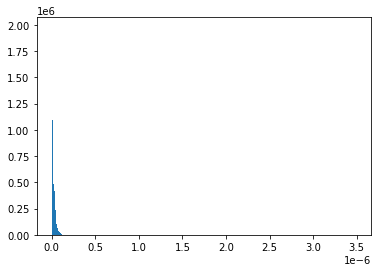

In [30]:
plt.hist(df_nn_all['diff2'], bins=1000)
plt.show()

In [31]:
df_enriched_diff = chi2_diff_test(df_nn_all, df=1, FDR=False, candidates=candidates)
df_enriched_diff


Total enriched: 14 / 9000000


,idx,dist,rank,correspondence_score,idx,dist,rank,correspondence_score,diff2,diff2_rank,p_val,enriched_rank
Dlk1_Notch1,"(2850, 308)",0.003498,203758,5.529902,"(2850, 308)",0.003837,208511,5.529902,1.147869e-07,40073,0.027811,1
Wnt6_Fzd10,"(676, 2271)",0.003846,231850,4.530276,"(676, 2271)",0.004182,237025,4.530276,1.129523e-07,43335,0.029088,2
Rspo3_Lgr5,"(2179, 2281)",0.002618,139574,7.985494,"(2179, 2281)",0.002950,143031,7.985494,1.103233e-07,48895,0.031026,3
Angpt1_Fgfr2,"(1309, 969)",0.004182,260642,4.120489,"(1309, 969)",0.004506,265479,4.120489,1.051811e-07,64202,0.035215,4
Spon2_Itgam,"(986, 214)",0.003185,179969,6.330947,"(986, 214)",0.003508,183228,6.330947,1.043778e-07,67769,0.035921,5
Cxcl12_Dpp4,"(2926, 2152)",0.002676,143476,8.047994,"(2926, 2152)",0.002996,146086,8.047994,1.020683e-07,76302,0.038035,6
Wnt6_Fzd6,"(676, 1350)",0.004486,287846,3.626454,"(676, 1350)",0.004805,293170,3.626454,1.017229e-07,77705,0.038362,7
Apoe_Lrp2,"(2992, 2583)",0.002760,149445,7.384593,"(2992, 2583)",0.003077,151853,7.384593,1.003120e-07,83806,0.039729,8
Wnt16_Fzd10,"(2442, 2271)",0.002026,102574,16.103748,"(2442, 2271)",0.002341,104478,16.103748,9.923311e-08,88745,0.040809,9
Lama4_Prnp,"(519, 1114)",0.002805,152625,7.412534,"(519, 1114)",0.003119,154837,7.412534,9.836734e-08,92925,0.041698,10


#### GSEA:

In [32]:
genelist = get_genelist(df_enriched_diff, saveas='knk_result_genes')
len(genelist)

22

In [33]:
genelist

['Prnp',
 'Notch1',
 'Wnt16',
 'Wnt6',
 'Itga6',
 'Ctgf',
 'Lama4',
 'Cxcl12',
 'Col6a6',
 'Spon2',
 'Itgam',
 'Lrp2',
 'Apoe',
 'Lgr5',
 'Lama2',
 'Fzd6',
 'Fzd10',
 'Dlk1',
 'Fgfr2',
 'Angpt1',
 'Rspo3',
 'Dpp4']

In [35]:
import gseapy as gp

enr = gp.enrichr(gene_list= genelist,
                 gene_sets='GO_Biological_Process_2021',
                 organism='Human', 
                 outdir=None, #'enrichr_kegg',
                 no_plot=True,
                 cutoff=0.05 
                )

In [36]:
enr.results.head(10)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2021,canonical Wnt signaling pathway (GO:0060070),4/68,8.534814e-07,0.000612,0,0,69.145833,966.239873,WNT6;FZD6;FZD10;WNT16
1,GO_Biological_Process_2021,Wnt signaling pathway (GO:0016055),4/92,2.878102e-06,0.001032,0,0,50.227273,640.818609,WNT6;FZD6;FZD10;WNT16
2,GO_Biological_Process_2021,ventricular cardiac muscle tissue morphogenesi...,3/34,6.761030e-06,0.001616,0,0,101.597623,1209.452168,NOTCH1;LRP2;FGFR2
3,GO_Biological_Process_2021,coronary artery morphogenesis (GO:0060982),2/5,1.152678e-05,0.002066,0,0,665.833333,7571.082740,NOTCH1;LRP2
4,GO_Biological_Process_2021,regulation of dendritic spine maintenance (GO:...,2/8,3.221082e-05,0.003506,0,0,332.866667,3442.909226,PRNP;APOE
5,GO_Biological_Process_2021,coronary vasculature morphogenesis (GO:0060977),2/8,3.221082e-05,0.003506,0,0,332.866667,3442.909226,NOTCH1;LRP2
6,GO_Biological_Process_2021,positive regulation of ERK1 and ERK2 cascade (...,4/172,3.423350e-05,0.003506,0,0,26.203704,269.434497,NOTCH1;ANGPT1;APOE;FGFR2
7,GO_Biological_Process_2021,negative regulation of extracellular matrix or...,2/10,5.169863e-05,0.004119,0,0,249.625000,2463.818516,DPP4;NOTCH1
8,GO_Biological_Process_2021,ectoderm development (GO:0007398),2/10,5.169863e-05,0.004119,0,0,249.625000,2463.818516,ITGAM;ITGA6
9,GO_Biological_Process_2021,regulation of amyloid precursor protein catabo...,2/12,7.572389e-05,0.005053,0,0,199.680000,1894.647073,PRNP;APOE


#### vis:

In [37]:
Xct.add_names_to_nets(obj1)
Xct.add_names_to_nets(obj2)

completed.
completed.


In [38]:
targets = vis.get_Xct_pairs(df_enriched_diff)
targets

(['Dlk1', 'Notch1'],
 ['Wnt6', 'Fzd10'],
 ['Rspo3', 'Lgr5'],
 ['Angpt1', 'Fgfr2'],
 ['Spon2', 'Itgam'],
 ['Cxcl12', 'Dpp4'],
 ['Wnt6', 'Fzd6'],
 ['Apoe', 'Lrp2'],
 ['Wnt16', 'Fzd10'],
 ['Lama4', 'Prnp'],
 ['Ctgf', 'Itgam'],
 ['Lama4', 'Itga6'],
 ['Col6a6', 'Itga6'],
 ['Lama2', 'Prnp'])

In [39]:
scale_factor = 10

identified 154 TF(s) along with 2 ligand/receptor target gene(s)
undirected graph constructed: 
# of nodes: 19, # of edges: 20

identified 154 TF(s) along with 2 ligand/receptor target gene(s)
undirected graph constructed: 
# of nodes: 21, # of edges: 20

graphs merged: 
# of nodes: 40, # of edges: 40

edge from Wnt6 to Fzd10 added
edge from Wnt16 to Fzd10 added


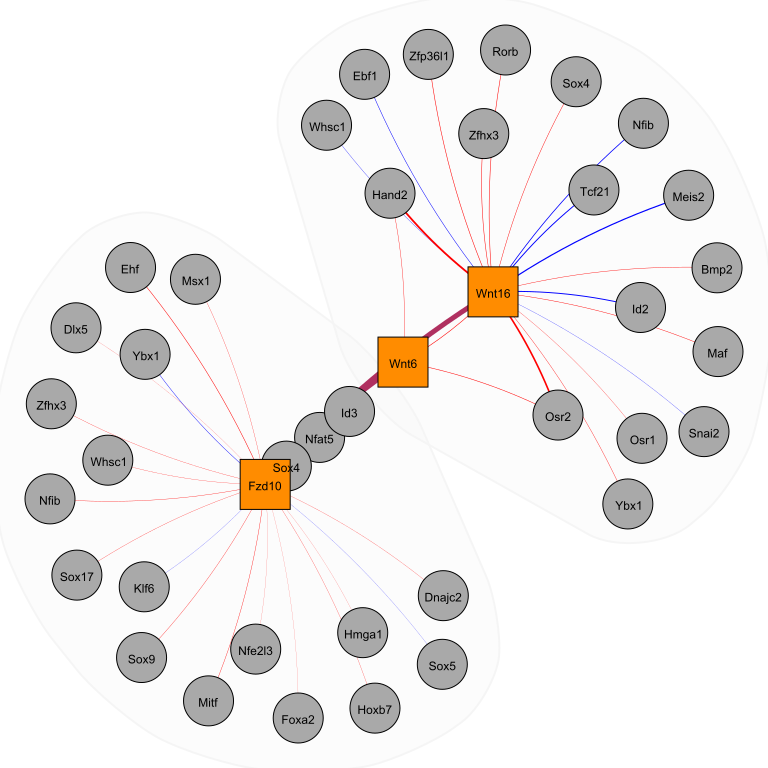

In [45]:
g1 = vis.plot_pcNet(obj1, view='sender', gene_names=[targets[1][0], targets[8][0]], top_edges=20, show = False, verbose = True)
g2 = vis.plot_pcNet(obj1, view='receiver', gene_names=[targets[1][1], targets[8][0]], top_edges=20, show = False, verbose = True)

vis.plot_XNet(g1, g2, Xct_pair = [targets[1], targets[8]], verbose = True, edge_width_scale=scale_factor)

identified 154 TF(s) along with 2 ligand/receptor target gene(s)
undirected graph constructed: 
# of nodes: 19, # of edges: 20

identified 153 TF(s) along with 2 ligand/receptor target gene(s)
undirected graph constructed: 
# of nodes: 21, # of edges: 20

graphs merged: 
# of nodes: 40, # of edges: 40

edge from Wnt6 to Fzd10 added
edge from Wnt16 to Fzd10 added


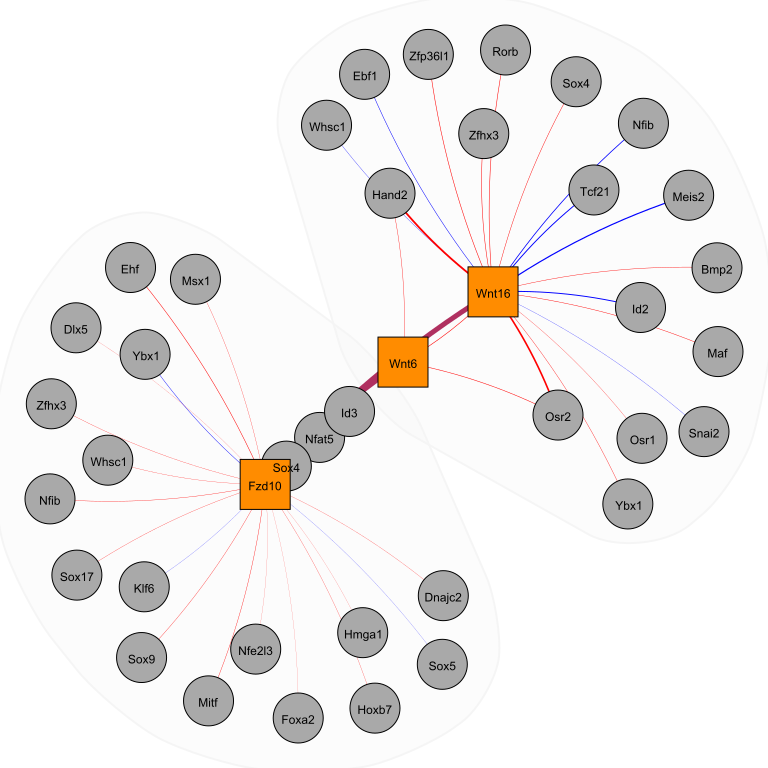

In [43]:
g1 = vis.plot_pcNet(obj2, view='sender', gene_names=[targets[1][0], targets[8][0]], top_edges=20, show = False, verbose = True)
g2 = vis.plot_pcNet(obj2, view='receiver', gene_names=[targets[1][1], targets[8][1]], top_edges=20, show = False, verbose = True)

vis.plot_XNet(g1, g2, Xct_pair = [targets[1], targets[8]], verbose = True, edge_width_scale=scale_factor)